In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy.stats import t
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = []
for i in range(1897, 2019):
    file = 'Boston-Marathon-Data-Project-master/results{num}.csv'.format(num = i)
    temp = pd.read_csv(file)
    temp['year'] = i
    data.append(temp)
data = pd.concat(data)
data = data[['year', 'seconds', 'age', 'overall']]
data = data.dropna()
data.to_csv('Data.csv')

In [3]:
data = pd.read_csv('Data.csv', usecols=['year', 'seconds', 'age', 'overall'])
data['pace'] = data['seconds'] / 25
win = data[data['overall'] == 1]
win.head()

,year,seconds,age,overall,pace
0,1897,10510.0,23.0,1.0,420.40
1,1898,9720.0,22.0,1.0,388.80
2,1899,10478.0,23.0,1.0,419.12
3,1900,9584.0,0.0,1.0,383.36
11,1901,9584.0,0.0,1.0,383.36


# What we will measuring

In [4]:
# Time vs year, age, overal

# Scatterplot

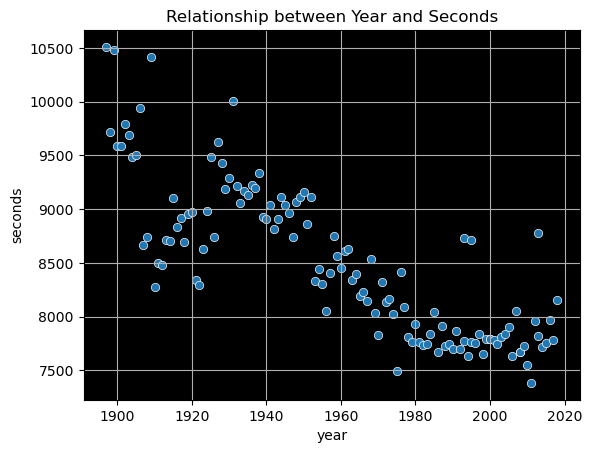

In [5]:
sns.set_style(rc = {'axes.facecolor': 'black'})
sns.scatterplot(x = 'year', y = 'seconds',data = win)
plt.title("Relationship between Year and Seconds")
mpl.rcParams['grid.color'] = 'blue'
plt.grid()

# Linear Regression

In [6]:
print(win.shape)
more = pd.DataFrame()
more = more.append(win)
for i in range(5):
    more = more.append(more)
more.shape

(127, 5)


C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\390452949.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  more = more.append(win)
C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\390452949.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  more = more.append(more)
C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\390452949.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  more = more.append(more)
C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\390452949.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  more = more.append(more)
C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\390452949.py:5: FutureWarning: The frame.append

(4064, 5)

In [7]:
X = more[['year']]
X = pd.get_dummies(data=X, drop_first=True)
y = more[['seconds']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train, X_train_Sm.astype(float)).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     6910.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:53:48   Log-Likelihood:                -24096.
No. Observations:                3251   AIC:                         4.820e+04
Df Residuals:                    3249   BIC:                         4.821e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.064e+04    386.642    105.105      0.000    3.99e+04    4.14e+04
year         -16.4023      0.197    -83.129      0.000     -16.789     -16.015
==============================================================================
Omnibus:                       80.399   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.336
Skew:                           0.315   Prob(JB):                     2.69e-22
Kurtosis:                       3.580   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
def p(year):
    return ls.params[1] * year + ls.params[0]
win['PRD'] = win['year'].apply(p)
win.head()

C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\2045575446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['PRD'] = win['year'].apply(p)


,year,seconds,age,overall,pace,PRD
0,1897,10510.0,23.0,1.0,420.40,9522.796368
1,1898,9720.0,22.0,1.0,388.80,9506.394024
2,1899,10478.0,23.0,1.0,419.12,9489.991680
3,1900,9584.0,0.0,1.0,383.36,9473.589335
11,1901,9584.0,0.0,1.0,383.36,9457.186991


In [19]:
ls.params[0]

40638.043570853944

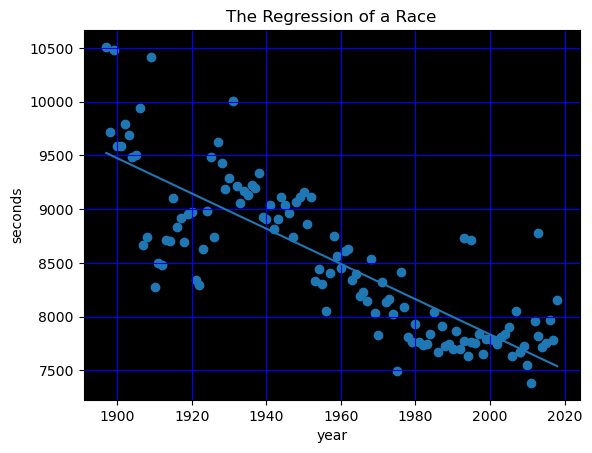

In [9]:
plt.scatter(win['year'], win['seconds'])
X_plot = np.linspace(1897, 2018)
plt.plot(X_plot, X_plot * ls.params[1] + ls.params[0])
plt.grid()
plt.xlabel('year')
plt.ylabel('seconds')
plt.title('The Regression of a Race')
plt.show()

In [10]:
win['residuals'] = win['seconds'] - win['PRD']
win['residuals'].min()

C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\2948163592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['residuals'] = win['seconds'] - win['PRD']


-1035.5658919171838

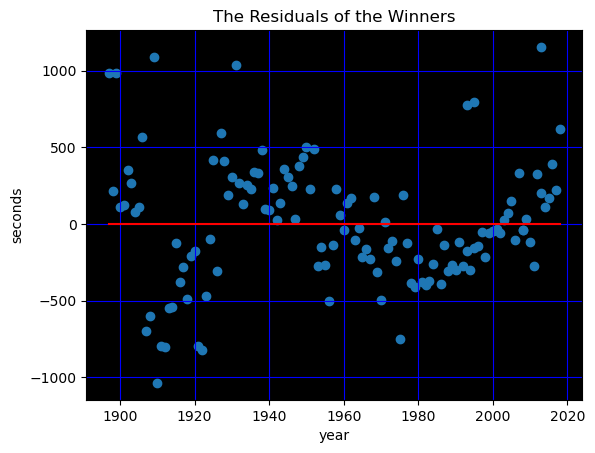

In [11]:
plt.scatter(win['year'], win['residuals'])
X_plot = np.linspace(1897, 2018)
plt.plot(X_plot, X_plot * 0, color = 'r')
plt.grid()
plt.xlabel('year')
plt.ylabel('seconds')
plt.title('The Residuals of the Winners')
plt.show()

# Normal Distribution

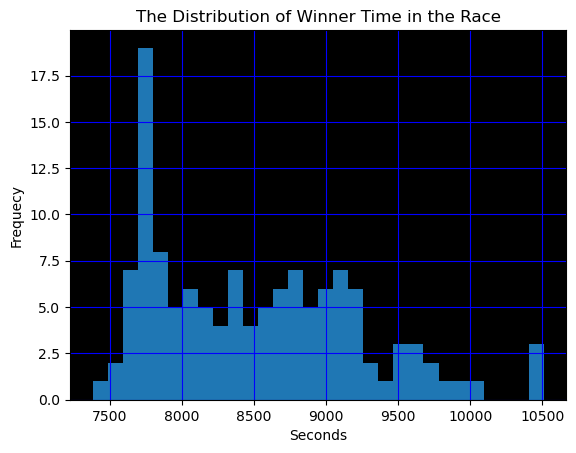

In [12]:
win['seconds'].hist(bins = 30)
plt.grid(False)
plt.title("The Distribution of Winner Time in the Race")
plt.xlabel("Seconds")
plt.ylabel("Frequecy")
plt.grid()

# Hypothesis Testing

In [13]:
def time(f):
    if int(f) <= 1960:
        return 'E'
    else:
        return 'L'
win['time'] = win['year'].apply(time)
win.head()

C:\Users\jasai\AppData\Local\Temp\ipykernel_10580\2634195738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['time'] = win['year'].apply(time)


,year,seconds,age,overall,pace,PRD,residuals,time
0,1897,10510.0,23.0,1.0,420.40,9522.796368,987.203632,E
1,1898,9720.0,22.0,1.0,388.80,9506.394024,213.605976,E
2,1899,10478.0,23.0,1.0,419.12,9489.991680,988.008320,E
3,1900,9584.0,0.0,1.0,383.36,9473.589335,110.410665,E
11,1901,9584.0,0.0,1.0,383.36,9457.186991,126.813009,E


In [14]:
xe = win[win['time'] == 'E']['seconds'].mean()
xl = win[win['time'] == 'L']['seconds'].mean()
se = win[win['time'] == 'E']['seconds'].std()
sl = win[win['time'] == 'L']['seconds'].std()
ne = win[win['time'] == 'E']['seconds'].count()
nl = win[win['time'] == 'L']['seconds'].count()
t_stat = (xl - xe) /  np.sqrt(se ** 2 / ne + sl ** 2 / nl)
p_value = t.cdf(t_stat, df=(ne + nl -2))
if p_value < 0.05:
    print("Reject", t_stat, p_value)
else:
    print("Fail", t_stat, p_value)

Reject -14.243808516745414 3.0055847924466895e-28


In [15]:
xl - xe

-1113.5126488095239

In [16]:
line = xl - xe + win['seconds'].mean()
line

7390.818059851893

In [17]:
ne + nl

127

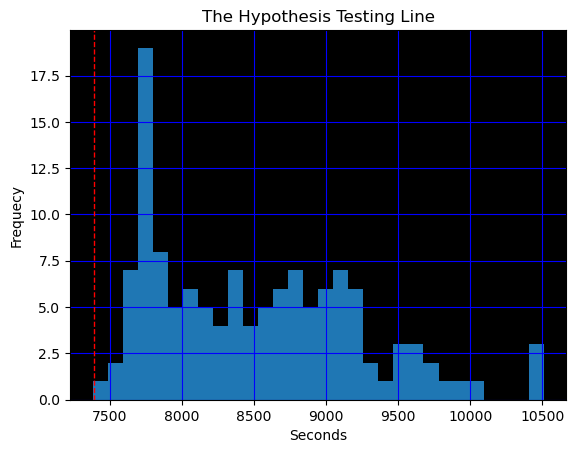

In [18]:
win['seconds'].hist(bins = 30)
plt.grid(False)
plt.title("The Hypothesis Testing Line")
plt.xlabel("Seconds")
plt.ylabel("Frequecy")
plt.axvline(line, color='r', linestyle='dashed', linewidth=1)
plt.grid()